#Visualising Vancouver Crime data

The data comes from the Vancouver Open Data Catalogue.
It was extracted on 2017-07-18 and it contains 530,652 records from 2003-01-01 to 2017-07-13.
The original data set contains coordinates in UTM Zone 10 (columns X and Y). I also included Latitude and Longitude, which I converted using this spreadsheet that can be found here.

Kaggle Data Link : https://www.kaggle.com/datasets/wosaku/crime-in-vancouver

#Importing Dependencies

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualisation
import matplotlib.pyplot as plt #data plotting and visualisation
%matplotlib inline 


# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing required modules
from zipfile import ZipFile
#Assign the path <<<<<<<<
path =  "/content/drive/Othercomputers/Lenovo/Machine_Learning/Miscellenous/Hertfordshire/Infographics/Data.zip"
# specifying the zip file name
file_name = path
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')


File Name                                             Modified             Size
crime.csv                                      2019-09-20 22:05:40     58922129
googletrend.csv                                2019-09-20 22:05:46         2451
Crime_Analysis_v2.ipynb                        2022-08-08 23:31:16      1592757
Extracting all the files now...
Done!


In [ ]:
        
data = pd.read_csv("/content/crime.csv")
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


#Exploratory data analysis

In [ ]:
# data.shape
print('number of rows in the dataset are : ', data.shape[0], 'number of columns in the dataset are : ', data.shape[1] )

number of rows in the dataset are :  530652 number of columns in the dataset are :  12


In [ ]:
data.dtypes

TYPE              object
YEAR               int64
MONTH              int64
DAY                int64
HOUR             float64
MINUTE           float64
HUNDRED_BLOCK     object
NEIGHBOURHOOD     object
X                float64
Y                float64
Latitude         float64
Longitude        float64
dtype: object

In [ ]:
data.nunique()

TYPE                 11
YEAR                 15
MONTH                12
DAY                  31
HOUR                 24
MINUTE               60
HUNDRED_BLOCK     21204
NEIGHBOURHOOD        24
X                 95502
Y                 93544
Latitude         101885
Longitude         98972
dtype: int64

In [ ]:
data.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

In [ ]:
data.drop(['MINUTE', 'X', 'Y', 'Latitude', 'Longitude'], axis=1, inplace=True)
data.dropna(inplace=True)
data.shape

(474015, 7)

In [ ]:
data.reset_index(drop=True, inplace=True)

#Plot 1: Total Crimes by Neighbourhood in Vancouver

In [ ]:
#How many crimes were commited in these neighbourhoods?
count_type= data[['NEIGHBOURHOOD','YEAR','TYPE']].groupby(['YEAR','NEIGHBOURHOOD']).count().reset_index(drop=False)
print(count_type)

     YEAR              NEIGHBOURHOOD  TYPE
0    2003              Arbutus Ridge   616
1    2003  Central Business District  9818
2    2003          Dunbar-Southlands   773
3    2003                   Fairview  3476
4    2003         Grandview-Woodland  3140
..    ...                        ...   ...
355  2017                 Strathcona   806
356  2017                     Sunset   407
357  2017        Victoria-Fraserview   325
358  2017                   West End  1360
359  2017            West Point Grey   206

[360 rows x 3 columns]


In [ ]:
def group_data(df,col1,col2):
    subdata = df.groupby([col1,col2]).count().reset_index(drop=False)
    subdata = subdata[[col1,col2,'TYPE']]
    subdata.columns = [col1,col2,'Counts']
    return subdata

att_dept = group_data(data,'NEIGHBOURHOOD','YEAR')
att_dept

,NEIGHBOURHOOD,YEAR,Counts
0,Arbutus Ridge,2003,616
1,Arbutus Ridge,2004,649
2,Arbutus Ridge,2005,619
3,Arbutus Ridge,2006,441
4,Arbutus Ridge,2007,361
...,...,...,...
355,West Point Grey,2013,279
356,West Point Grey,2014,365
357,West Point Grey,2015,363
358,West Point Grey,2016,399


In [ ]:
cmap = plt.get_cmap('Pastel2')

<ipython-input-17-d96936806241>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-17-d96936806241>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontfamily='serif', fontsize=12)
<ipython-input-17-d96936806241>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sorted_counts.index, fontfamily='serif', fontsize=12)


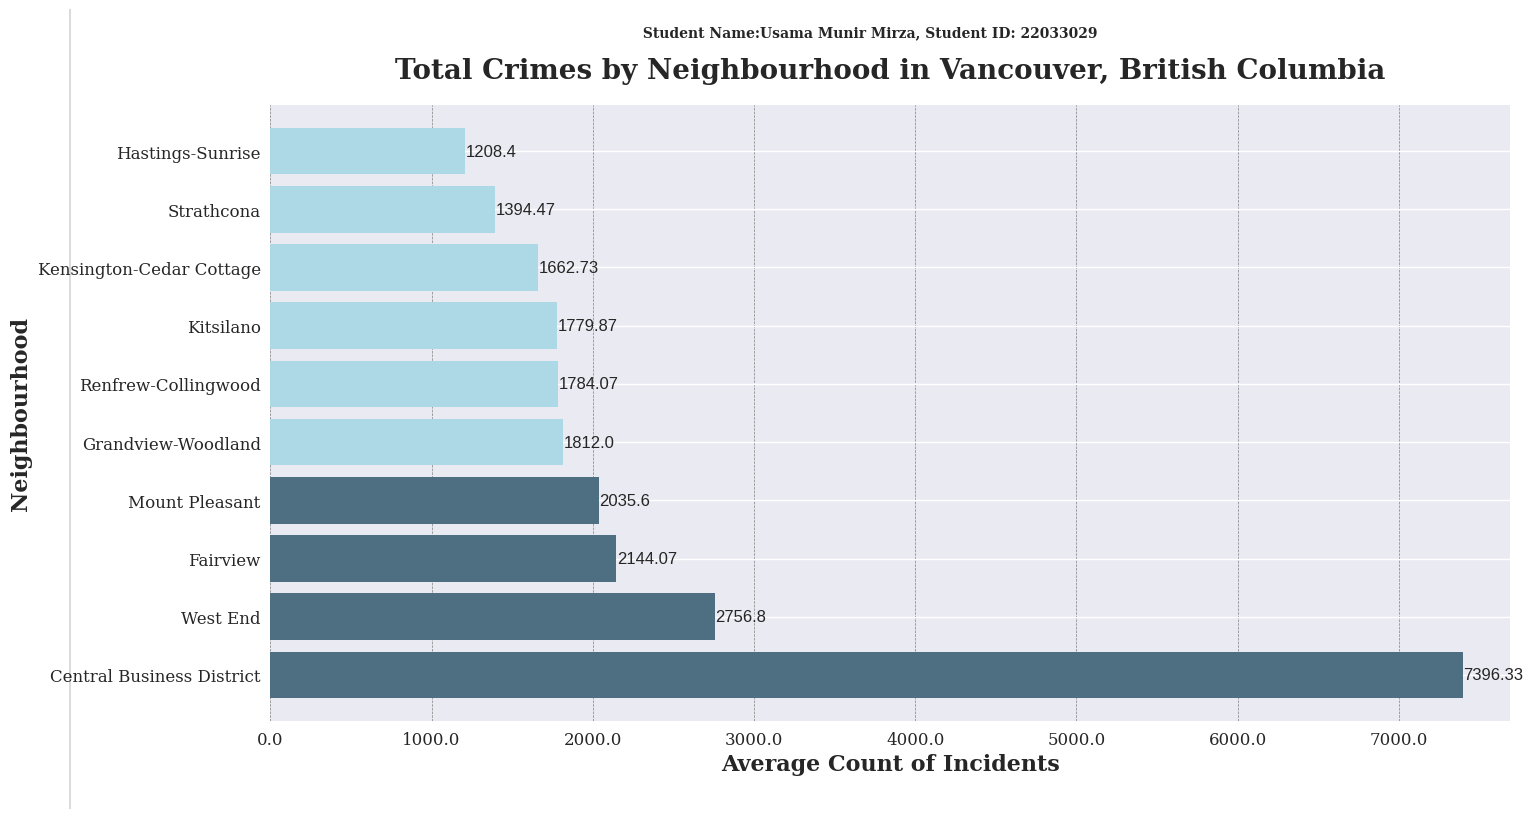

In [ ]:
import matplotlib.pyplot as plt
# Set style
plt.style.use('seaborn')
# Group the data by neighbourhood and calculate the average count of incidents for each neighbourhood
avg_counts = att_dept.groupby('NEIGHBOURHOOD')['Counts'].mean()

# Sort the result in descending order
sorted_counts = avg_counts.sort_values(ascending=False)[:10]

# Set up color map
colors = ['#4E6E81', '#4E6E81', '#4E6E81', '#4E6E81', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']

# Create a figure and axes object
fig, ax = plt.subplots(figsize=[16, 8])

# Create a horizontal bar plot of the sorted counts
ax.barh(sorted_counts.index, sorted_counts.values, color=colors)

# Add annotations to the bars
for i, count in enumerate(sorted_counts.values):
    # Set the x and y positions for the text
    x_pos = count + 5
    y_pos = i
    
    # Add the text to the plot
    ax.text(x_pos, y_pos, str(round(count, 2)), va='center', fontsize=12)

# Format tick labels
ax.set_xticklabels(ax.get_xticks(), fontfamily='serif', fontsize=12)
ax.set_yticklabels(sorted_counts.index, fontfamily='serif', fontsize=12)

# Set the title and labels for the plot
plt.title('Total Crimes by Neighbourhood in Vancouver, British Columbia', fontsize=20, fontweight='bold', fontfamily='serif', y=1.03)
fig.suptitle(' Student Name:Usama Munir Mirza, Student ID: 22033029 ', fontsize=10, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Average Count of Incidents', fontsize=16, fontweight='bold', fontfamily='serif')
ax.set_ylabel('Neighbourhood', fontsize=16, fontweight='bold', fontfamily='serif')

# Adjust margins to prevent y-tick labels from being cut off
plt.margins(0.04)

# Add grid lines to aid in readability
plt.grid(True, axis='x', color='gray', linestyle='--', linewidth=0.5)

# Remove tick marks
ax.tick_params(axis=u'both', which=u'both', length=0)

# Remove borders
for side in ['top', 'bottom', 'right']:
    ax.spines[side].set_visible(False)

# Add a line at the left edge of the plot
line = plt.Line2D([0, 0], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([line])
plt.savefig('crime_by_neighbourhood.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show();



This Figure indicates that the Central Business District Neighborhood has had the highest number of reported crimes overall, followed by the West End Neighborhood and Fairview Neighborhood. On the other hand, the neighborhoods with the least reported crimes throughout the years are Musqueam followed by Stanley Park, South Cambie, and Shaughnessy.

#Plot 2: Crime Frequency (per Hour) in Vancouver

In [ ]:
crimes = pd.read_csv('/content/crime.csv')
crimes.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [ ]:
g=pd.DataFrame(crimes.groupby(['NEIGHBOURHOOD', 'TYPE']).count().reset_index().sort_values('YEAR',ascending=False))
g=g[['NEIGHBOURHOOD','TYPE','YEAR']].sort_values(['NEIGHBOURHOOD', 'YEAR'],ascending=[True,False]).rename(columns={'YEAR':'NUMBER OF OCCURENCES'}).reset_index()
del g['index']
g

,NEIGHBOURHOOD,TYPE,NUMBER OF OCCURENCES
0,Arbutus Ridge,Theft from Vehicle,1852
1,Arbutus Ridge,Break and Enter Residential/Other,1672
2,Arbutus Ridge,Mischief,934
3,Arbutus Ridge,Theft of Vehicle,498
4,Arbutus Ridge,Other Theft,337
...,...,...,...
211,West Point Grey,Theft of Bicycle,372
212,West Point Grey,Break and Enter Commercial,331
213,West Point Grey,Vehicle Collision or Pedestrian Struck (with I...,305
214,West Point Grey,Other Theft,260


In [ ]:
#At what time most of the crimes occurred
byHour=pd.value_counts(crimes['HOUR']).sort_index(ascending=True)

flatByHour = []
for i in range(0,len(byHour)):
    flatByHour.append(np.repeat(i, byHour[i]))
    
arr=np.concatenate(flatByHour, axis=0 )  

<ipython-input-21-338da831d25e>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


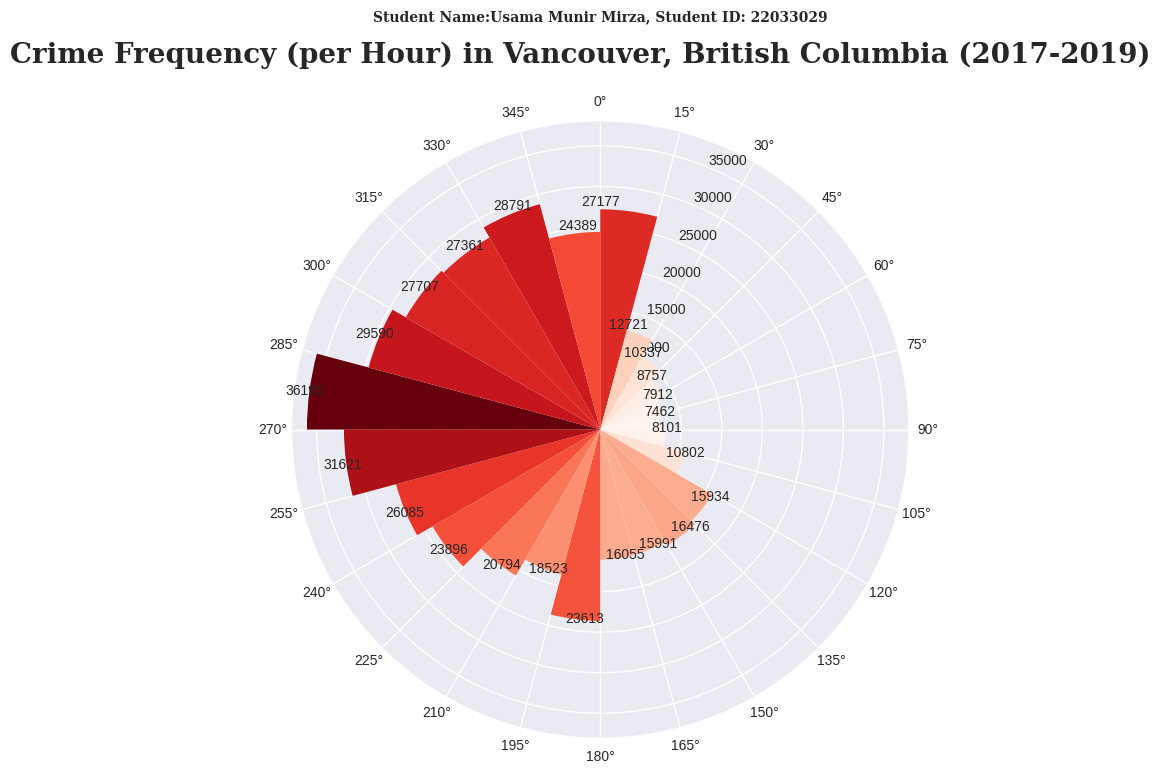

In [ ]:
N = 24

# Creating theta for 24 hours with an offset, so that the bars for each hour would not be centered relative to the labels
theta = np.linspace(7.5*np.pi/180, 2 * np.pi + 7.5*np.pi/180, N, endpoint=False)

# Setting the properties for a polar plot
radii, tick = np.histogram(arr, bins=24)
width = (2*np.pi) / N

# Plotting a polar plot
plt.figure(figsize=(16,8))
ax = plt.subplot(111, projection='polar')
plt.suptitle('Crime Frequency (per Hour) in Vancouver, British Columbia (2017-2019)', fontsize=20, fontweight='bold', fontfamily='serif')
plt.title("Student Name:Usama Munir Mirza, Student ID: 22033029", y=1.15, fontsize=10, fontweight='bold', fontfamily='serif')

# Setting the ticks
thetaticks = np.arange(0, 360, 15)
ax.set_thetagrids(thetaticks, labels=None)

bars = ax.bar(theta, radii, width=width)

# Set labels to go clockwise and start from the top
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Setting the labels
ticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']

# Set colors for highest 3 values
cmap = plt.cm.get_cmap('Reds')
normalize = plt.Normalize(vmin=radii.min(), vmax=radii.max())
colors = [cmap(normalize(value)) for value in radii]
for i in range(24):
    bars[np.argsort(radii)[-1-i]].set_facecolor(colors[np.argsort(radii)[-1-i]])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.015), ha='center')
plt.savefig('Crime Frequency (per Hour).png', dpi=300, bbox_inches='tight')
plt.show()


The polar plot provides an analysis of crimes that occur during each hour of the day. The results indicate that the highest number of crimes occur between 6 pm and 7 pm, followed by 5 pm to 6 pm and 7 pm to 8 pm. In contrast, the lowest number of crimes occur between 4 am to 6 am, with the lowest occurrence at 5 am to 6 am. Based on these findings, it can be concluded that the majority of crimes occur in the afternoon and early evening, with the least amount of crimes occurring in the morning hours.

#Plot 3: Crime Count by Category per Year in Vancouver

In [ ]:
dfcrime = pd.read_csv('/content/crime.csv')
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [ ]:
# Cleaning & Transforming the data
dfcrime['HOUR'].fillna(00, inplace = True)
dfcrime['NEIGHBOURHOOD'].fillna('N/A', inplace = True)
dfcrime['HUNDRED_BLOCK'].fillna('N/A', inplace = True)
#del dfcrime['MINUTE']
dfcrime['NeighbourhoodID'] = dfcrime.groupby('NEIGHBOURHOOD').ngroup().add(1)
dfcrime['CrimeTypeID'] = dfcrime.groupby('TYPE').ngroup().add(1)
dfcrime['Incident'] = 1
dfcrime['Date'] = pd.to_datetime({'year':dfcrime['YEAR'], 'month':dfcrime['MONTH'], 'day':dfcrime['DAY']})
#dfcrime['DayOfWeek'] = dfcrime['Date'].dt.weekday_name 
dfcrime['DayOfWeek'] = dfcrime['Date'].dt.strftime("%A")
dfcrime['DayOfWeekID'] = dfcrime['Date'].dt.weekday
dfpred = dfcrime[(dfcrime['YEAR'] >= 2017)]
dfcrime = dfcrime[(dfcrime['YEAR'] < 2017)]

# Calling a dataframe results
dfcrime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,NeighbourhoodID,CrimeTypeID,Incident,Date,DayOfWeek,DayOfWeekID
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-12,Monday,0
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-05-07,Wednesday,2
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-23,Wednesday,2
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-20,Sunday,6
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,21,6,1,2003-04-12,Saturday,5


In [ ]:
%matplotlib inline
#Has crime changed over the years? Is it decreasing?
# Crime count by Category per year
dfPivCrimeDate = dfcrime.pivot_table(values='Incident'
                                     ,aggfunc=np.size
                                     ,columns='TYPE'
                                     ,index='YEAR'
                                     ,fill_value=0)

In [ ]:
tmp = dfPivCrimeDate

<ipython-input-26-3aac3c21b7a7>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(),fontsize=12, fontweight='bold', fontfamily='serif')
<ipython-input-26-3aac3c21b7a7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(),fontsize=12, fontweight='bold', fontfamily='serif')


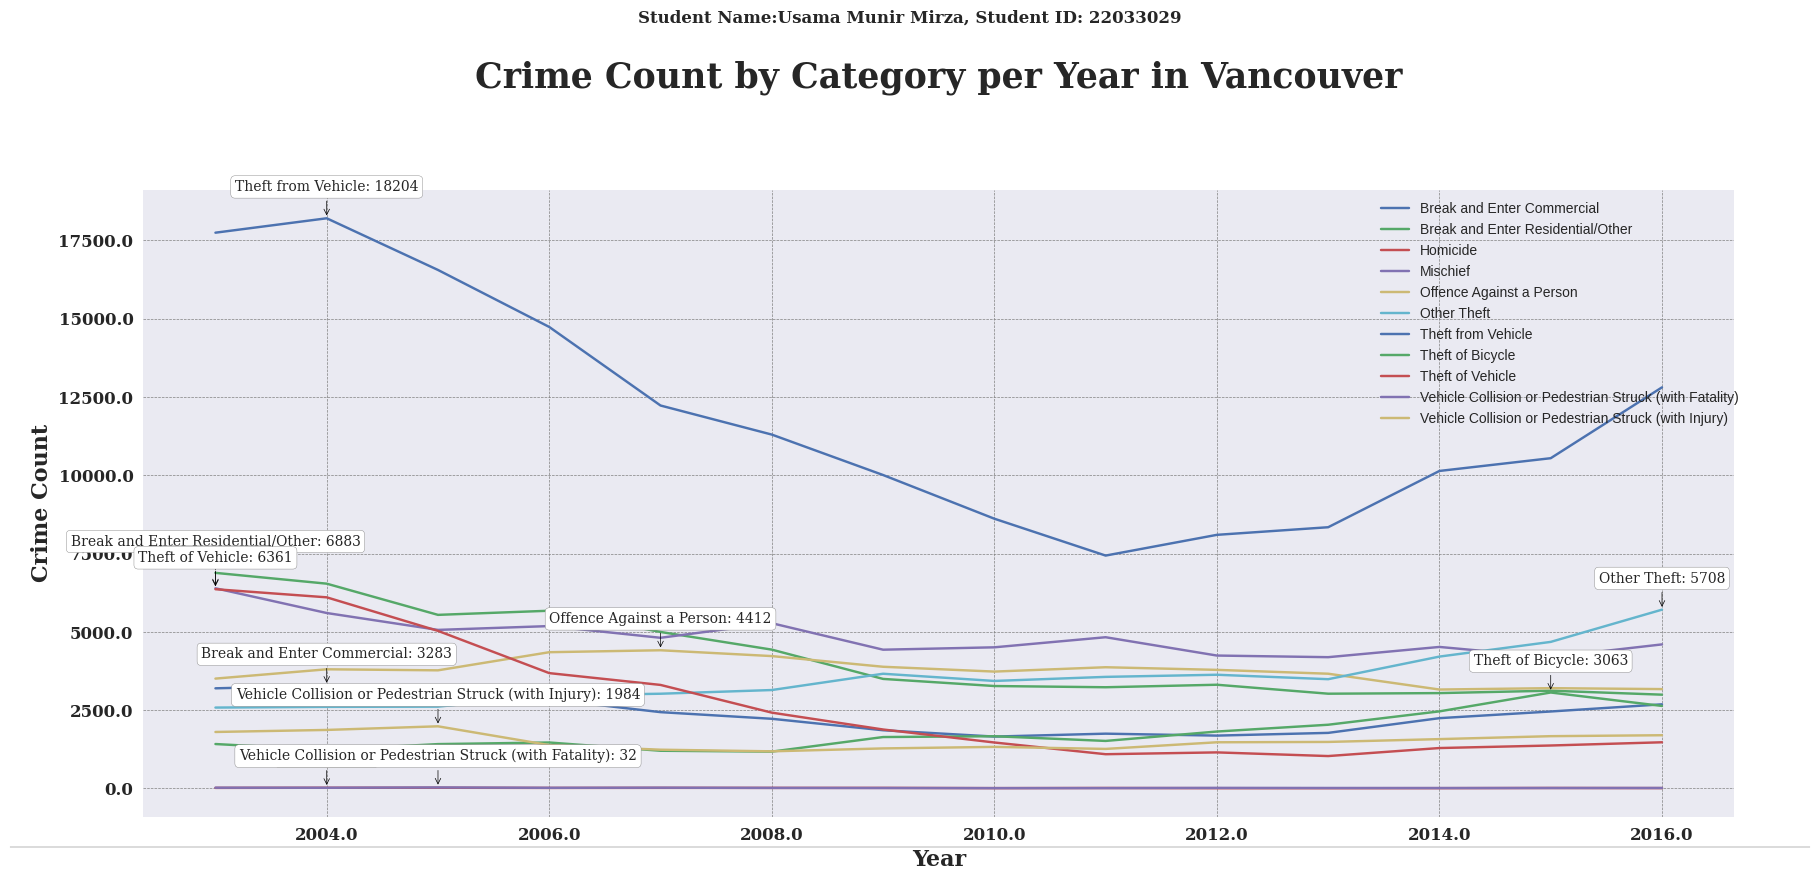

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 9))

# Plot each column in a different color
for col in tmp.columns:
    ax.plot(tmp.index, tmp[col], label=col)

# Set the x-axis and y-axis labels
ax.set_xlabel('Year', fontsize=16, fontfamily='serif', fontweight='bold')
ax.set_ylabel('Crime Count', fontsize=16, fontfamily='serif', fontweight='bold')

# Set the title and position it above the plot
plt.suptitle('Student Name:Usama Munir Mirza, Student ID: 22033029', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title("Crime Count by Category per Year in Vancouver", y=1.15, fontsize=25, fontweight='bold', fontfamily='serif')
ax.legend(loc='upper left', bbox_to_anchor=(.77, 1))

# Format tick labels
ax.set_xticklabels(ax.get_xticks(),fontsize=12, fontweight='bold', fontfamily='serif')
ax.set_yticklabels(ax.get_yticks(),fontsize=12, fontweight='bold', fontfamily='serif')

# Add grid lines to aid in readability
plt.grid(True, axis='both', color='gray', linestyle='--', linewidth=0.5)

# Remove tick marks
ax.tick_params(axis='both', length=0)
# Remove borders
for side in ['top', 'bottom', 'right', 'left']:
    ax.spines[side].set_visible(False)

# Add a line at the bottom of the plot
line = plt.Line2D([0, 1], [0.05, 0.05], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([line])

# Add annotations
for col in tmp.columns:
    max_val = tmp[col].max()
    max_idx = tmp[col].idxmax()
    ax.annotate(f'{col}: {max_val}', xy=(max_idx, max_val), xytext=(max_idx, max_val+1000), 
                ha='center', va='center', fontsize=10, fontfamily='serif',
                arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.5), bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

# Adjust plot boundaries to make better use of the space
plt.tight_layout(pad=1.5)
plt.savefig('crime_count_category.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

The Figure above shows a line plot  where we can observe crime trends for various types of crimes from 2003 to 2016. The crime trends vary for different types of crimes.
For commercial break and enter crimes, the highest number of incidents was reported in 2004 and then declined in 2005. The number of incidents then increased until 2010 and then decreased. The trend generally increased from 2012 to 2016.
For residential break and enter crimes, the highest number of incidents was reported in 2003 and then gradually decreased until 2005. There was a spike in 2006, followed by an exponential decrease until 2016.
For homicide crimes, the trend was on a constant increase from 2003 to 2004, with the highest number of incidents reported in 2004 and 2005. The number of incidents then decreased until 2006, followed by another peak in 2007. There was a general decrease until 2013, with the lowest number of incidents reported in 2013. The number of incidents then increased until 2015 and decreased again in 2016.
For mischief crimes, there was a general decrease in the number of incidents reported throughout the years, with the lowest number of incidents reported in 2013 and the highest in 2003.
For offenses against a person, the number of incidents increased from 2004 to 2008, with the highest number of incidents reported in 2008. The number of incidents then decreased until 2014 and remained stable until 2016.
For other theft crimes, there was an exponential increase in the number of incidents reported from 2003 to 2016, with the highest number of incidents reported in 2016.
For theft from vehicle crimes, there was a peak in 2004, followed by a constant decrease until 2011, with the lowest number of incidents reported in 2011. The number of incidents then increased until 2016, forming a second peak.
For theft of bicycle crimes, there was a gradual increase in the number of incidents reported, with the highest number of incidents reported in 2014, followed by a decrease until 2016.
For theft of vehicle crimes, there was a peak in 2004, followed by an exponential decrease until 2013, with the lowest number of incidents reported in 2013. The number of incidents then increased again until 2016.
For vehicle collision or pedestrian struck crimes with fatality, there was a peak in 2005, followed by a general decrease until 2010, with the lowest number of incidents reported in 2010. The number of incidents then increased until 2012 and decreased again in 2014, followed by an increase until 2016.
For vehicle collision or pedestrian struck crimes with injury, there was an increasing trend from 2003 to 2005, with the highest number of incidents reported in 2005. The number of incidents then drastically decreased until 2008, with the lowest number of incidents reported in 2008. The number of incidents then increased until 2016.


#Plot 4: Google trends vs Vancouver Crime

In [ ]:
# Importing the data
googletrend = pd.read_csv('/googletrend.csv', index_col='Month')

In [ ]:
# Taking a look at the first entries
googletrend.head()

,Search Index
Month,
2004-01-31,99
2004-02-29,98
2004-03-31,100
2004-04-30,83
2004-05-31,82


In [ ]:
googletrend.columns

Index(['Search Index'], dtype='object')

In [ ]:
# Importing CSV file
crimes = pd.read_csv('/content/crime.csv')
crimes.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [ ]:
# Creating a date column from the date parts
crimes['DATE'] = pd.to_datetime({'year':crimes['YEAR'], 'month':crimes['MONTH'], 'day':crimes['DAY']})

# Change the index to the colum 'DATE'
crimes.index = pd.DatetimeIndex(crimes['DATE'])

In [ ]:
# The crime data starts from 2003, but our Google data starts from 2004 and ends in 2017-06. 
# Let's remove 2003 from our crime data and 2017-07.
crimes = crimes[(crimes['DATE'] > '2003-12-31') & (crimes['DATE'] < '2017-07-01') ]

# The crime data lists all individual crimes. 
# We need to group it by month to compare it to the Google trend.
crimes_month = pd.DataFrame(crimes.resample('M').size()) 

In [ ]:
crimes_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2004-01-31 to 2017-06-30
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       162 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [ ]:
# Just renaming the column...
crimes_month.columns = ['Total']

# Taking a look at the data
crimes_month.head()

,Total
DATE,
2004-01-31,3767
2004-02-29,3697
2004-03-31,4254
2004-04-30,4116
2004-05-31,4042


In [ ]:
search = googletrend['Search Index'].values
search

array([ 99,  98, 100,  83,  82,  75,  70,  71,  78,  78,  92,  59,  70,
        86,  89,  67,  60,  63,  58,  63,  66,  80,  93,  67,  78,  64,
        80,  67,  59,  59,  69,  52,  57,  71,  69,  58,  56,  59,  62,
        60,  61,  49,  62,  51,  52,  63,  68,  51,  54,  63,  61,  63,
        62,  51,  57,  53,  59,  61,  69,  60,  56,  74,  69,  63,  61,
        46,  54,  52,  52,  62,  70,  58,  55,  56,  65,  61,  55,  61,
        54,  50,  66,  68,  69,  60,  61,  62,  60,  58,  50,  57,  54,
        53,  60,  61,  71,  61,  61,  63,  66,  55,  51,  50,  59,  52,
        55,  65,  65,  62,  63,  70,  67,  61,  63,  58,  60,  59,  63,
        67,  67,  57,  68,  65,  64,  63,  59,  59,  62,  67,  66,  71,
        73,  65,  70,  73,  86,  77,  70,  65,  65,  63,  68,  73,  75,
        69,  83,  93,  93,  80,  67,  74,  73,  69,  84,  84,  80,  65,
        80,  79,  83,  74,  71,  74])

In [ ]:
# Dividing the total number of crimes by the maximum value and round them
crimes_month['Crime Index'] = (crimes_month['Total']/crimes_month['Total']
                               .max()*100).astype(int)

In [ ]:
#crime_trend = pd.concat([crimes_month['Crime Index'],googletrend], axis =1)
crime_trend = pd.DataFrame(crimes_month['Crime Index'])
crime_trend['Search Index'] = search
crime_trend.head()

,Crime Index,Search Index
DATE,,
2004-01-31,82,99
2004-02-29,81,98
2004-03-31,93,100
2004-04-30,90,83
2004-05-31,88,82


In [ ]:
#Using a 6-Months Moving Average
# Now let's use a 6 months window
crime_trend_rolling6 = crime_trend.rolling(window=6).mean().dropna()

<ipython-input-39-721d81b5b728>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


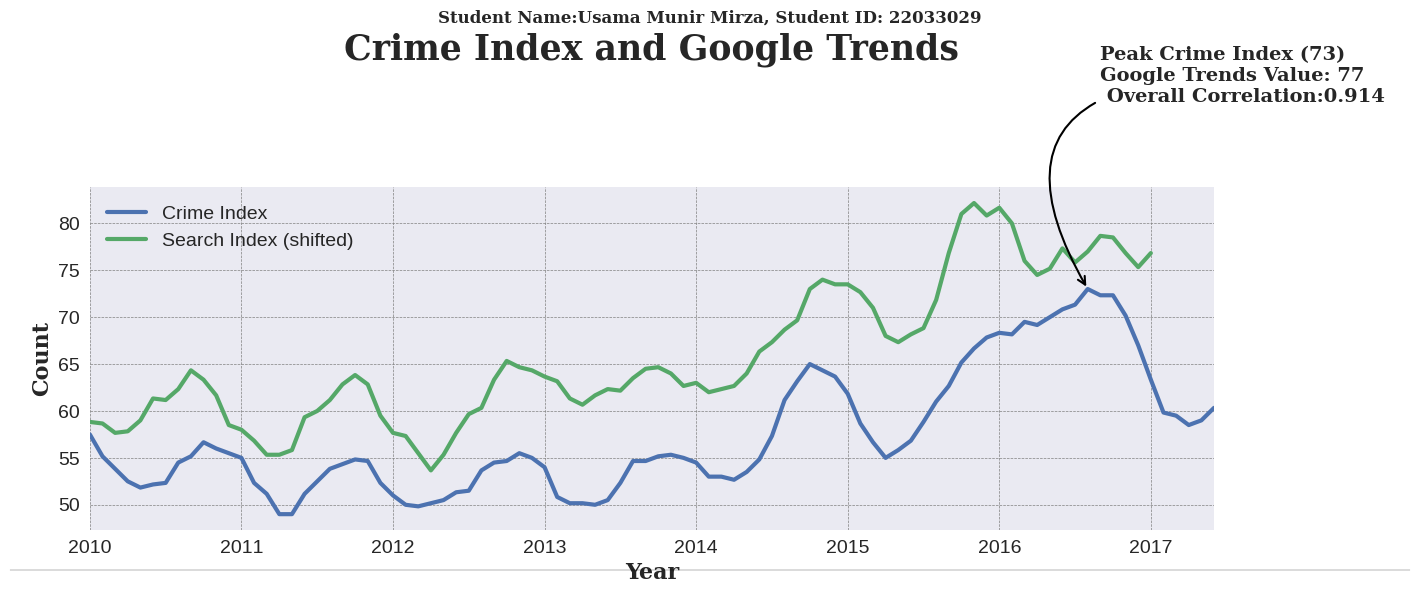

In [ ]:
# Using .shift(-5) to lag the search index
crime_trend_rolling6_shifted = pd.concat([crime_trend_rolling6['Crime Index'],
                                          crime_trend_rolling6['Search Index'].shift(-5)], axis=1)
crime_trend_rolling6_shifted.columns = ['Crime Index', 'Search Index (shifted)']

# Let's focus on 2010 on
crime_trend_rolling6_shifted = crime_trend_rolling6_shifted[crime_trend_rolling6_shifted.index >= '2010-01-01']

# Set the figure size and create subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data with different colors and add labels
crime_trend_rolling6_shifted.plot(ax=ax, linewidth=3)
# Set the title and position it above the plot
plt.suptitle('Student Name:Usama Munir Mirza, Student ID: 22033029', fontsize=12,y=.85, fontweight='bold', fontfamily='serif')
plt.title("Crime Index and Google Trends", fontsize=25,y=1.35, fontweight='bold', fontfamily='serif')

# plt.title('Crime Index and Google Trends (Shifted) - Moving Average', fontsize=16)
ax.set_xlabel('Year', fontsize=16, fontfamily='serif', fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontfamily='serif', fontweight='bold')
plt.tick_params(labelsize=14)
plt.legend(prop={'size': 14})

# Set style
plt.style.use('seaborn')

# Add grid lines to aid in readability
plt.grid(True, axis='both', color='gray', linestyle='--', linewidth=0.5)

# Remove tick marks
ax.tick_params(axis='both', length=0)
# Find the maximum value in the Crime Index column
max_value = crime_trend_rolling6_shifted['Crime Index'].max()

# Find the corresponding Search Index value
search_index = crime_trend_rolling6_shifted.loc[crime_trend_rolling6_shifted['Crime Index'] == max_value, 'Search Index (shifted)'].values[0]

# Add an annotation to the plot
ax.annotate(f"Peak Crime Index ({max_value:.0f})\nGoogle Trends Value: {search_index:.0f}\n Overall Correlation:0.914", 
            xy=(crime_trend_rolling6_shifted['Crime Index'].idxmax(), max_value), 
            xytext=(crime_trend_rolling6_shifted.index[-10], max_value + 20), 
            fontsize=14, fontfamily='serif', fontweight='bold', 
            arrowprops=dict(arrowstyle='->', connectionstyle="angle3,angleA=0,angleB=-60", lw=1.5))

# Remove borders
for side in ['top', 'bottom', 'right', 'left']:
    ax.spines[side].set_visible(False)

# Add a line at the bottom of the plot
line = plt.Line2D([0, 1], [0.05, 0.05], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([line])

# Adjust plot boundaries to make better use of the space
plt.tight_layout(pad=1.5)
plt.savefig('Crime Index and Google Trends.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


We have successfully ploted the Crime Index agains the google trends where the google trends moving average is taken with shift lag of 10. The goal of this plot is to check if there is any correlation between google searches of crime in Vancouver (British Columbia) and the total number of crimes in Vancouver. The assumption was that the number of searches reflects what's going on in the real world and people's sentiment. There is a very high correlation between the moving average of Google searches for crime and the total number of crimes in Vancouver.This is interesting. Note that after 2010 there is a lag between crime index and search index. When crime increases, it takes a while until searches increase. When crime index is reaching its local peak, the search start increasing.


In [ ]:
# Let's check the corrleation
crime_trend_rolling6_shifted.corr()

,Crime Index,Search Index (shifted)
Crime Index,1.000000,0.914938
Search Index (shifted),0.914938,1.000000
